<a href="https://colab.research.google.com/github/ShounakDas101/AIML_Hari/blob/main/Copy_of_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os
# Specify the path to the file in your Google Drive
file_path = '/content/drive/MyDrive/CSVs/bearing.csv'

if os.path.exists(file_path):
    print(f"The file '{file_path}' exists in your Google Drive.")
else:
    print(f"The file '{file_path}' does not exist in your Google Drive.")

The file '/content/drive/MyDrive/CSVs/bearing.csv' exists in your Google Drive.


In [20]:
players = pd.read_csv(file_path)

In [21]:
players.head()

,Patch,a1,a2,a3,a4,a5,a6,a7,a8,o1,...,M7,M8,m1,m2,m3,m4,m5,m6,m7,m8
0,1,170,36,15,14,11,5,7,5,7,...,9,2,128,70,35,17,15,3,4,3
1,2,407,69,12,14,8,4,2,2,25,...,7,3,309,118,52,21,16,4,0,2
2,3,67,15,5,2,1,2,1,1,17,...,1,0,40,22,19,4,5,2,1,3
3,4,119,33,11,8,11,2,1,3,2,...,5,4,83,71,23,7,4,10,1,1
4,5,218,37,15,8,6,0,3,3,15,...,4,2,137,95,22,12,12,2,7,3


In [22]:
features = ['Patch', 'a1', 'a2', 'a3','a4' ,'a5','a6','a7','a8','o1','o2','o3','o4','o5','o6','o7','o8','M1','M2','M3','M4','M5','M6','M7','M8','m1','m2','m3','m4','m5','m6','m7','m8']
players = players.dropna(subset=features)
data = players[features].copy()

In [23]:
data

,Patch,a1,a2,a3,a4,a5,a6,a7,a8,o1,...,M7,M8,m1,m2,m3,m4,m5,m6,m7,m8
0,1,170,36,15,14,11,5,7,5,7,...,9,2,128,70,35,17,15,3,4,3
1,2,407,69,12,14,8,4,2,2,25,...,7,3,309,118,52,21,16,4,0,2
2,3,67,15,5,2,1,2,1,1,17,...,1,0,40,22,19,4,5,2,1,3
3,4,119,33,11,8,11,2,1,3,2,...,5,4,83,71,23,7,4,10,1,1
4,5,218,37,15,8,6,0,3,3,15,...,4,2,137,95,22,12,12,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,5,166,22,8,9,5,6,3,4,6,...,1,5,112,48,27,10,14,8,4,4
1913,6,140,41,17,9,0,6,3,5,50,...,6,4,124,67,18,10,8,6,3,2
1914,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1915,8,2,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


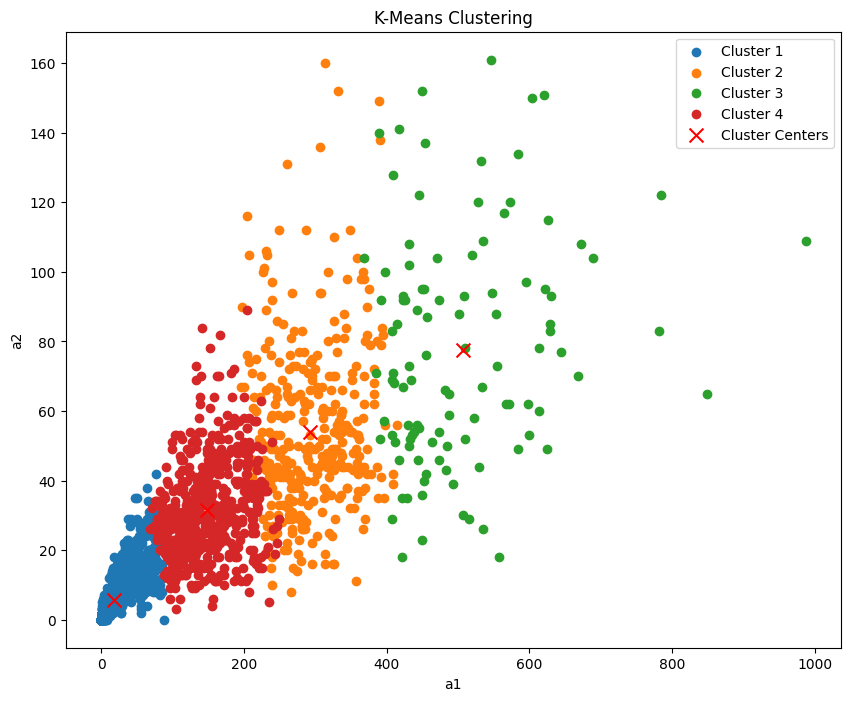

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data' contains your feature data

# Fit a K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)

# Assign cluster labels to data points
labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot for visualization
plt.figure(figsize=(10, 8))

# Plot data points with different colors based on their cluster labels
for cluster_label in range(4):
    cluster_data = data[labels == cluster_label]
    plt.scatter(cluster_data['a1'], cluster_data['a2'], label=f'Cluster {cluster_label + 1}')

# Plot cluster centers as red crosses
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('a1')
plt.ylabel('a2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [31]:
new_data = pd.read_csv('/content/drive/MyDrive/CSVs/test.csv')

In [32]:
predicted_labels = kmeans.predict(new_data)
print(predicted_labels)

[3 1 0 0 0 3 0 0 0]


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [ ]:
data.describe()

,Patch,a1,a2,a3,a4,a5,a6,a7,a8,o1,...,M7,M8,m1,m2,m3,m4,m5,m6,m7,m8
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,6.000000,2.425105,2.330357,2.430976,2.717593,2.082516,2.208333,2.189236,2.333333,1.791223,...,2.079060,2.689815,2.033758,2.507850,2.504630,2.277412,2.624228,2.498016,2.121795,1.909722
std,3.238751,2.366847,2.002957,2.064120,2.270831,1.596484,1.745624,1.788230,2.305360,1.864032,...,1.705119,2.340367,1.953879,2.329005,2.316479,1.954475,2.248370,2.201689,1.803146,1.476687
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,1.026882,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.027778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,6.000000,1.134409,1.285714,1.606061,1.666667,1.588235,1.000000,1.000000,1.000000,1.106383,...,1.769231,1.000000,1.083333,1.173913,1.175439,1.526316,1.555556,1.714286,1.769231,1.000000
75%,8.500000,2.780914,3.142857,3.121212,3.666667,2.764706,3.000000,2.250000,3.000000,1.425532,...,2.538462,4.333333,2.229167,3.739130,3.456140,2.907895,3.222222,3.142857,2.538462,2.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [ ]:
data.head()

,Patch,a1,a2,a3,a4,a5,a6,a7,a8,o1,...,M7,M8,m1,m2,m3,m4,m5,m6,m7,m8
0,1.00,3.715054,3.714286,7.666667,9.666667,2.764706,6.0,4.75,9.0,1.319149,...,6.384615,6.000000,2.805556,4.826087,7.315789,3.105263,6.555556,6.000000,2.538462,2.0
1,2.25,5.704301,5.285714,6.454545,7.666667,4.529412,3.0,4.75,7.0,2.702128,...,4.076923,4.333333,3.388889,7.434783,7.666667,5.473684,6.555556,6.714286,7.153846,3.0
2,3.50,2.397849,4.285714,7.060606,5.000000,3.941176,3.0,3.50,3.0,5.042553,...,3.307692,6.000000,2.111111,3.956522,3.982456,2.842105,6.555556,2.428571,2.538462,2.0
3,4.75,5.166667,7.428571,7.060606,6.333333,3.941176,4.0,4.75,1.0,1.212766,...,3.307692,6.000000,2.361111,8.304348,10.298246,7.842105,6.000000,6.000000,7.923077,2.0
4,6.00,6.268817,2.571429,1.606061,3.000000,2.176471,3.0,3.50,1.0,4.510638,...,3.307692,2.666667,4.194444,6.304348,4.333333,4.157895,2.666667,3.857143,4.076923,3.0


In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 4)

In [ ]:
centroids

,0,1,2,3
Patch,8.500000,2.250000,6.000000,7.250000
a1,1.564516,6.080645,9.306452,1.000000
a2,6.714286,1.000000,1.000000,5.000000
a3,11.000000,1.000000,1.606061,1.000000
a4,1.000000,1.000000,2.333333,1.000000
a5,1.000000,1.588235,1.000000,1.000000
a6,2.000000,3.000000,1.000000,3.000000
a7,6.000000,4.750000,1.000000,1.000000
a8,1.000000,1.000000,5.000000,9.000000
o1,1.000000,1.000000,1.000000,1.106383


In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data, centroids)

In [ ]:
labels.value_counts()

1    116
2     19
0      7
3      2
dtype: int64

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

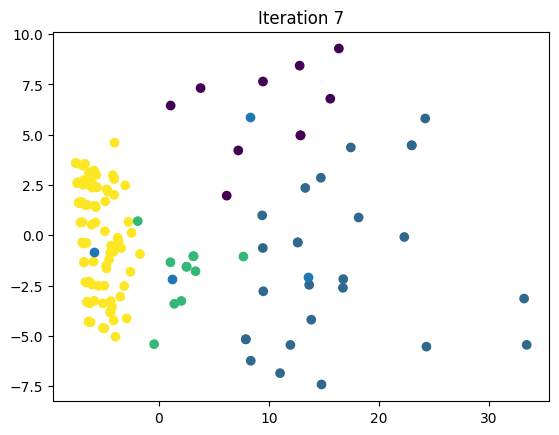

In [ ]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2,3
Patch,7.495640,2.670988,4.058545,5.551310
a1,6.268634,5.456934,2.025432,1.109747
a2,4.224607,5.546521,2.455927,1.146604
a3,3.732115,5.323723,2.916102,1.252431
a4,3.631070,6.062810,3.368119,1.364130
a5,2.552431,3.979251,2.758689,1.218892
a6,1.930782,4.166908,3.560669,1.272101
a7,2.856627,3.833410,2.642160,1.251699
a8,2.124712,3.743536,2.458643,1.237152
o1,6.444655,2.071788,1.457341,1.071007


In [ ]:
labels.value_counts()

3    97
1    26
2    11
0    10
dtype: int64

In [ ]:
players[labels == 0][["hist_area"] + features]

KeyError: ignored

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(4)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3
Patch,5.466019,4.882353,3.111111,3.000000
a1,5.864078,193.705882,98.222222,328.166667
a2,1.553398,30.588235,23.333333,40.166667
a3,1.262136,14.235294,11.055556,18.166667
a4,1.019417,6.294118,5.500000,10.000000
a5,0.708738,6.000000,3.666667,4.000000
a6,0.563107,2.764706,2.666667,3.500000
a7,0.388350,2.647059,1.833333,3.166667
a8,0.300971,1.588235,1.666667,1.333333
o1,0.834951,38.823529,9.888889,24.500000


In [ ]:
# Add the cluster labels as a new column to the original DataFrame
data['Cluster'] = kmeans.labels_


# Create a DataFrame to store the original data and cluster labels
new_labeled_data = data.copy()
new_labeled_data['Cluster'] = kmeans.labels_



# Group the data by cluster label and print the members of each cluster
for label, group in new_labeled_data.groupby('Cluster'):
    print(f'Cluster {label}:')
    print(group)
    print('\n')


Cluster 0:
     Patch   a1  a2  a3  a4  a5  a6  a7  a8  o1  ...  M8   m1   m2  m3  m4  \
1        2  175  30  18  10   6   2   3   3  16  ...   2   86   74  38  17   
3        4  155  45  20   8   5   3   3   0   2  ...   3   49   84  53  26   
4        5  196  11   2   3   2   2   2   0  33  ...   1  115   61  19  12   
5        6  212  36  13   7   8   3   2   2  94  ...   4  180   57  27  12   
8        9  149  16   9   2   1   0   3   0  43  ...   0   94   42  19  12   
13       5  221  35   9   4   5   2   1   1   8  ...   2  149   69  28  16   
17       9  175  23  12   6   6   4   2   0  58  ...   2  147   34  18  15   
50       6  218  31  11   4   5   0   3   2  78  ...   2  130   63  36  18   
55       2  152  42  21  15  12   3   5   2   6  ...   3   47   62  54  36   
59       6  241  42  28  11  10   5   1   2  53  ...   0   94  114  57  33   
104      6  218  31  11   4   5   0   3   2  78  ...   2  130   63  36  18   
117      1  173  27  14   6   4   3   7   0   9  ... 